In [1]:
!pip install cufflinks

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
pd.options.display.float_format='{:.2f}'.format

In [5]:
pd.set_option('display.max_rows',None)

# Importing The Dataset

In [6]:
df = pd.read_csv(r'C:\Users\Asus\Downloads\Covid_19_Clean_Complete.csv')

In [7]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.94,67.71,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15,20.17,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03,1.66,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.51,1.52,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20,17.87,2020-01-22,0,0,0,0,Africa


In [8]:
df.shape

(49068, 10)

In [9]:
df.rename(columns={'Province/State':'state',
           'Country/Region':'country',
           'Province/State':'State'}, inplace = True)

In [10]:
df.head()

,State,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.94,67.71,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15,20.17,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03,1.66,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.51,1.52,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20,17.87,2020-01-22,0,0,0,0,Africa


# Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       14664 non-null  object 
 1   country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   Date        49068 non-null  object 
 5   Confirmed   49068 non-null  int64  
 6   Deaths      49068 non-null  int64  
 7   Recovered   49068 non-null  int64  
 8   Active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [12]:
df.isnull().sum()

State         34404
country           0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [13]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.00,49068.00,49068.00,49068.00,49068.00,49068.00
mean,21.43,23.53,16884.90,884.18,7915.71,8085.01
std,24.95,70.44,127300.21,6313.58,54800.92,76258.90
min,-51.80,-135.00,0.00,0.00,0.00,-14.00
25%,7.87,-15.31,4.00,0.00,0.00,0.00
50%,23.63,21.75,168.00,2.00,29.00,26.00
75%,41.20,80.77,1518.25,30.00,666.00,606.00
max,71.71,178.06,4290259.00,148011.00,1846641.00,2816444.00


# Confirmed death

In [14]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
5,2020-01-27,2927
6,2020-01-28,5578
7,2020-01-29,6166
8,2020-01-30,8234
9,2020-01-31,9927


In [15]:
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
5,2020-01-27,82
6,2020-01-28,131
7,2020-01-29,133
8,2020-01-30,171
9,2020-01-31,213


In [16]:
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
5,2020-01-27,61
6,2020-01-28,107
7,2020-01-29,125
8,2020-01-30,141
9,2020-01-31,219


In [17]:
deaths.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [18]:
recovered.head()

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [19]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [21]:
#Plotly
confirmed.iplot(kind='bar',x='Date',y='Confirmed')

In [22]:
deaths.iplot(kind='bar',x='Date', y='Deaths')

In [23]:
recovered.iplot(kind='bar',x='Date',y='Recovered')

# Prediction

In [24]:
from prophet import Prophet

In [25]:
df.head()

,State,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.94,67.71,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15,20.17,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03,1.66,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.51,1.52,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20,17.87,2020-01-22,0,0,0,0,Africa


In [26]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [27]:

deaths.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [28]:

recovered.head()

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [29]:

recovered.head()

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


# Predction Of Confirmed

In [30]:
# date=ds(datestamp, column=y)
confirmed.columns=['ds','y']
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
5,2020-01-27,2927
6,2020-01-28,5578
7,2020-01-29,6166
8,2020-01-30,8234
9,2020-01-31,9927


In [31]:
model=Prophet(interval_width=0.95)
model.fit(confirmed)

23:42:52 - cmdstanpy - INFO - Chain [1] start processing
23:42:53 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
future=model.make_future_dataframe(periods=162)
future


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [33]:
forecast_confirmed=model.predict(future)

In [34]:
forecast_confirmed[['ds','yhat','yhat_lower','yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
290,2020-11-07,37187061.78,31868358.14,42476674.31
291,2020-11-08,37384850.86,31977950.26,42819944.43
292,2020-11-09,37579729.48,32183112.69,43016457.65
293,2020-11-10,37769332.87,32337617.79,43318908.34
294,2020-11-11,37979369.94,32301469.65,43675021.36
295,2020-11-12,38193518.40,32644149.89,43938220.06
296,2020-11-13,38408941.68,32718449.02,44182240.71
297,2020-11-14,38616749.79,32823640.23,44465876.59
298,2020-11-15,38814538.87,33002590.60,44765922.44
299,2020-11-16,39009417.49,33159953.76,45083982.34


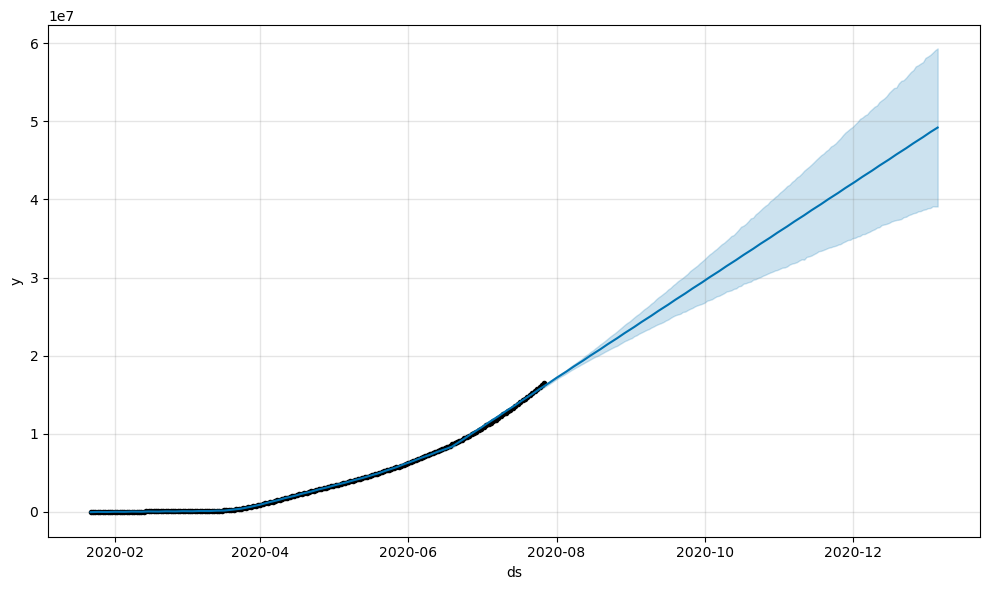

In [35]:
confirmed_forcast_plot=model.plot(forecast_confirmed)

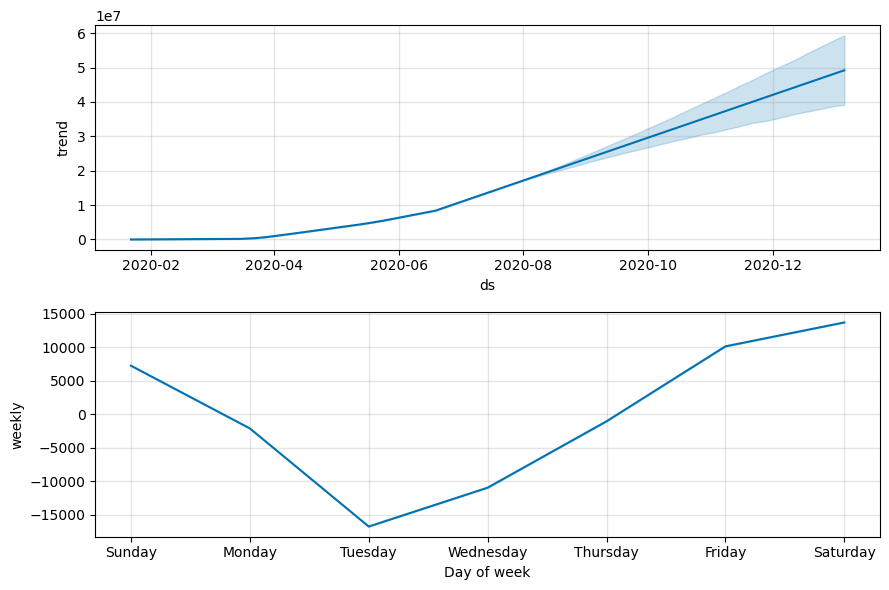

In [36]:
confirmed_forecast_plot_components=model.plot_components(forecast_confirmed)

# Prediction Deaths

In [37]:
# date=ds(datestamp, column=y)
deaths.columns=['ds','y']
deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
5,2020-01-27,82
6,2020-01-28,131
7,2020-01-29,133
8,2020-01-30,171
9,2020-01-31,213


In [38]:
model=Prophet(interval_width=0.99)
model.fit(deaths)

23:46:08 - cmdstanpy - INFO - Chain [1] start processing
23:46:08 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
future=model.make_future_dataframe(periods=162)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [40]:
forecast_deaths=model.predict(future)


In [41]:
forecast_deaths[['ds','yhat','yhat_lower','yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
290,2020-11-07,1166960.95,735517.15,1535015.90
291,2020-11-08,1171098.95,734372.05,1547527.33
292,2020-11-09,1175390.34,733263.68,1556320.68
293,2020-11-10,1180598.37,728847.29,1567550.56
294,2020-11-11,1186166.29,724110.29,1576434.72
295,2020-11-12,1191777.26,726999.21,1588260.08
296,2020-11-13,1197294.48,724347.22,1595422.28
297,2020-11-14,1202177.98,721093.51,1605615.13
298,2020-11-15,1206315.99,719296.93,1613764.76
299,2020-11-16,1210607.37,715424.84,1624885.61


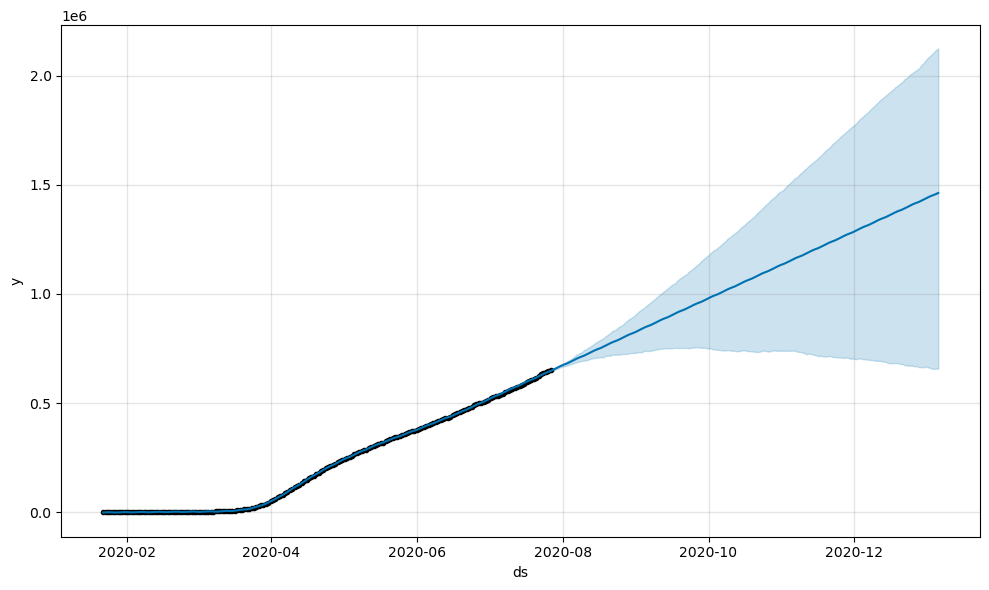

In [42]:
deaths_forcast_plot=model.plot(forecast_deaths)

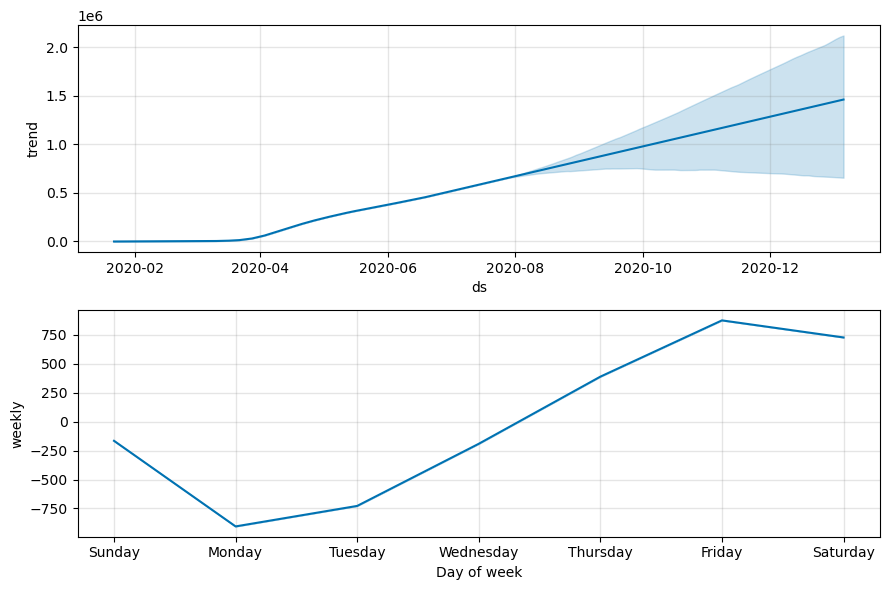

In [43]:
deaths_forecast_plot_components=model.plot_components(forecast_deaths)

# Prediction Recovered

In [44]:
# date=ds(datestamp, column=y)
recovered.columns=['ds','y']
recovered

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
5,2020-01-27,61
6,2020-01-28,107
7,2020-01-29,125
8,2020-01-30,141
9,2020-01-31,219


In [45]:
model=Prophet(interval_width=0.99)
model.fit(recovered)

23:49:28 - cmdstanpy - INFO - Chain [1] start processing
23:49:28 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
future=model.make_future_dataframe(periods=162)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [47]:
forecast_recovered=model.predict(future)

In [48]:
forecast_recovered[['ds','yhat','yhat_lower','yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
290,2020-11-07,23277487.96,18406540.77,27591457.97
291,2020-11-08,23403556.38,18391933.60,27817277.64
292,2020-11-09,23540140.73,18498681.58,27916293.99
293,2020-11-10,23667557.03,18480679.19,28150005.20
294,2020-11-11,23809746.64,18464737.28,28465684.59
295,2020-11-12,23952560.49,18650553.76,28762248.50
296,2020-11-13,24094124.07,18681636.12,28922426.29
297,2020-11-14,24234423.25,18709434.15,29024051.98
298,2020-11-15,24360491.67,18724760.48,29419541.64
299,2020-11-16,24497076.03,18739162.17,29493068.33


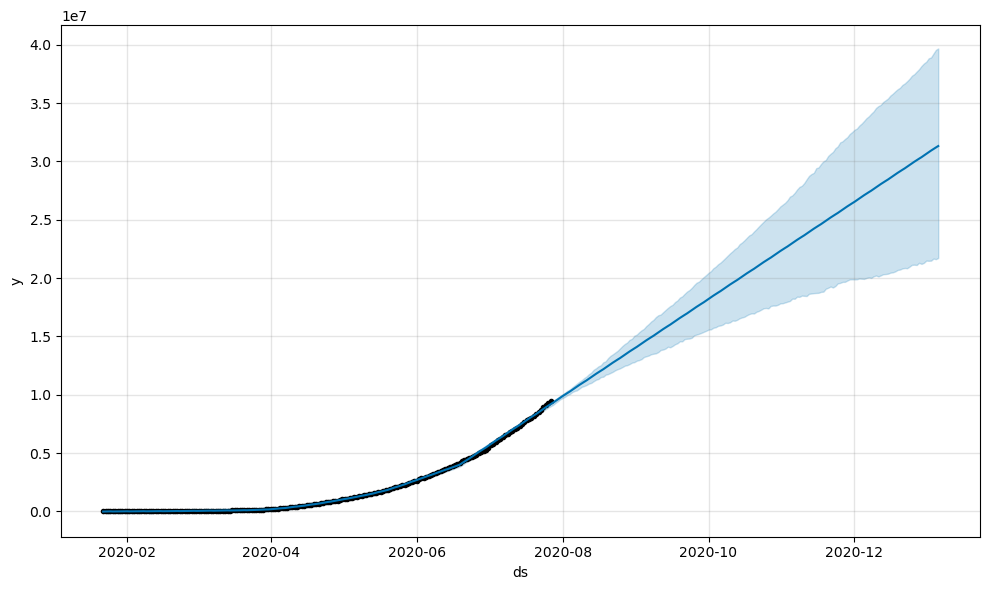

In [49]:
recovered_forcast_plot=model.plot(forecast_recovered)

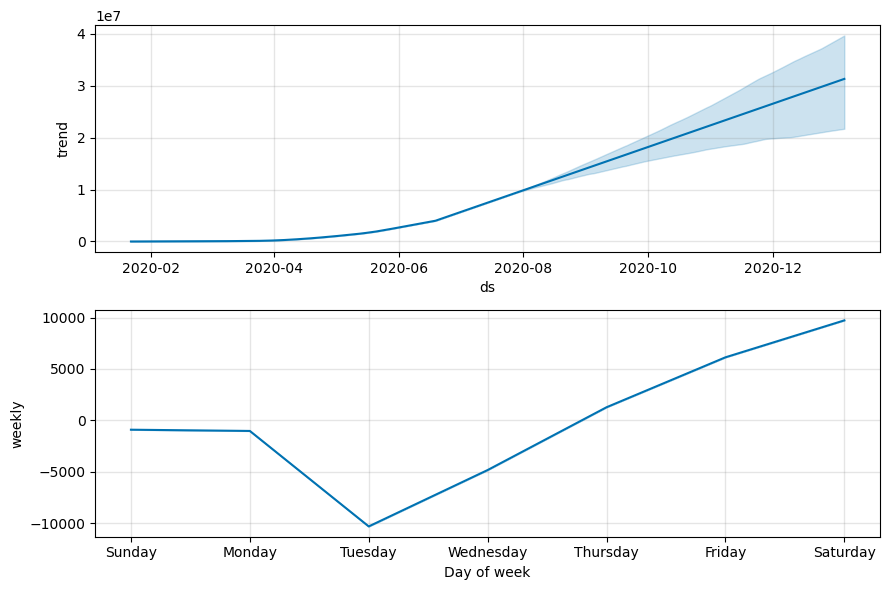

In [50]:
recovered_forecast_plot_components=model.plot_components(forecast_recovered)